In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_df = pd.read_csv('BTC-USD.csv')

In [3]:
train_df.shape

(1828, 7)

In [4]:
train_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
1,2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600
2,2016-01-06,431.855988,431.855988,426.341003,429.105011,429.105011,34042500
3,2016-01-07,430.010986,458.765991,429.076996,458.048004,458.048004,87562200
4,2016-01-08,457.537994,462.933990,447.937988,453.230011,453.230011,56993000


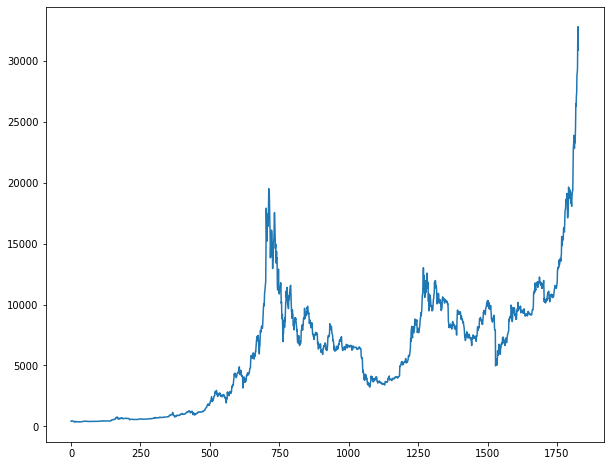

In [5]:
plt.figure(figsize=(10, 8))
plt.plot(train_df.iloc[:, 4])

In [6]:
X = []
y = []

for i in range(100, train_df.shape[0]):
    X.append(train_df.iloc[i-100:i, 4].values.flatten().tolist())
    y.append(train_df.iloc[i:i+1, 4].values.flatten().tolist())

X = np.array(X)
y = np.array(y)

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [8]:
X_train.shape

(1382, 100)

In [9]:
y_train.shape

(1382, 1)

In [10]:
X_test.shape

(346, 100)

In [11]:
y_test.shape

(346, 1)

In [12]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [13]:
y_train.shape

(1382, 1)

In [14]:
from keras.layers import LSTM, Dense
from keras.models import Sequential

Using TensorFlow backend.


In [15]:
model = Sequential()
model.add(LSTM(50, return_sequences=False, input_shape=(100, 1)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(X_train, y_train, batch_size=64, epochs=10)

Epoch 1/10
1382/1382 [==============================] - 4s 3ms/step - loss: 0.0073
Epoch 2/10
1382/1382 [==============================] - 3s 2ms/step - loss: 0.0011
Epoch 3/10
1382/1382 [==============================] - 3s 2ms/step - loss: 4.9262e-04
Epoch 4/10
1382/1382 [==============================] - 3s 2ms/step - loss: 4.6578e-04
Epoch 5/10
1382/1382 [==============================] - 3s 2ms/step - loss: 4.4915e-04
Epoch 6/10
1382/1382 [==============================] - 3s 2ms/step - loss: 4.3557e-04
Epoch 7/10
1382/1382 [==============================] - 3s 2ms/step - loss: 4.2587e-04
Epoch 8/10
1382/1382 [==============================] - 3s 2ms/step - loss: 4.1503e-04
Epoch 9/10
1382/1382 [==============================] - 3s 2ms/step - loss: 3.9511e-04
Epoch 10/10
1382/1382 [==============================] - 3s 2ms/step - loss: 3.7856e-04


In [18]:
pred = model.predict(X_test)
y_test = scaler.inverse_transform(y_test)
pred = scaler.inverse_transform(pred)

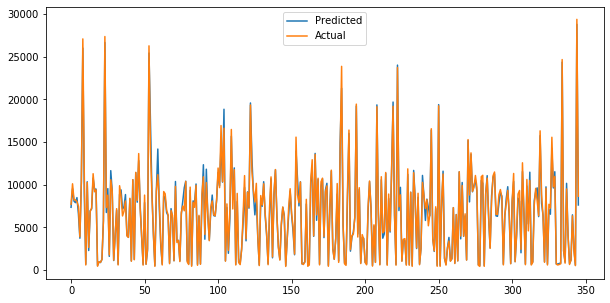

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(pred)
plt.plot(y_test)
plt.legend(['Predicted', 'Actual']);

In [20]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [21]:
model.fit(X_train, y_train, batch_size=64, epochs=10)

Epoch 1/10
1382/1382 [==============================] - 7s 5ms/step - loss: 0.0176
Epoch 2/10
1382/1382 [==============================] - 6s 4ms/step - loss: 0.0015
Epoch 3/10
1382/1382 [==============================] - 6s 4ms/step - loss: 9.0336e-04
Epoch 4/10
1382/1382 [==============================] - 5s 4ms/step - loss: 8.2476e-04
Epoch 5/10
1382/1382 [==============================] - 5s 4ms/step - loss: 7.4552e-04
Epoch 6/10
1382/1382 [==============================] - 5s 4ms/step - loss: 7.0591e-04
Epoch 7/10
1382/1382 [==============================] - 5s 4ms/step - loss: 6.5969e-04
Epoch 8/10
1382/1382 [==============================] - 5s 4ms/step - loss: 6.2505e-04
Epoch 9/10
1382/1382 [==============================] - 5s 4ms/step - loss: 6.0687e-04
Epoch 10/10
1382/1382 [==============================] - 5s 4ms/step - loss: 5.9469e-04


In [22]:
pred = model.predict(X_test)
pred = scaler.inverse_transform(pred)

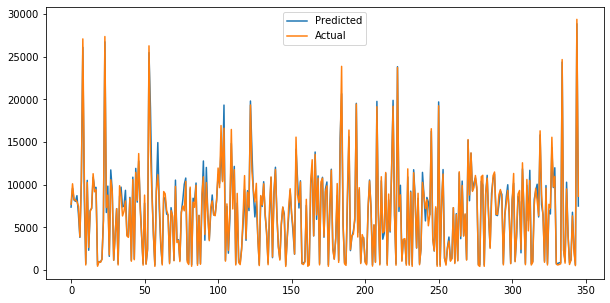

In [23]:
plt.figure(figsize=(10, 5))
plt.plot(pred)
plt.plot(y_test)
plt.legend(['Predicted', 'Actual']);